### 4-7. 프로젝트: 인물 모드 문제점 찾기

- 만들면서 뭔가 이상한 점 프로젝트를 통해 찾아보자.










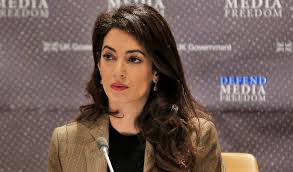

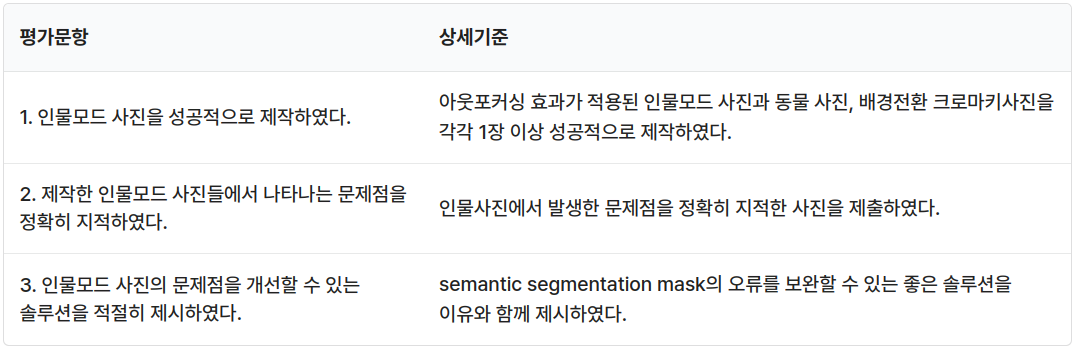



- 아웃포커싱 - 인물, 동물, 배경전환 크로마키,  각1장씩,  시맨틱 세그멘테이션 스텝에서 힌트.

  
  
  
  
- 배경을 blur하는 인물모드 사진이 아니라 배경사진을 다른 이미지로 교체하는 크로마키 배경 합성을 시도. 

  https://deep-learning-study.tistory.com/134 크로마키 합성 ; 녹색 또는 파란색 배경에서 찰영한 영상에 다른 배경 영상을 합성하는 기술




- importlib: 사용자가 파이썬의 import 시스템과 상호작용하기 위한 API를 제공하는 내장 라이브러리.



### Step 1. 인물모드 직접 해 보기

In [53]:
from importlib.metadata import version
import cv2
import pixellib
import os
import numpy as np
from pixellib.semantic import semantic_segmentation # pixellib.semantic: segmentation 기법 중, semantic segmentation을 쉽게 사용할 수 있도록 만든 라이브러리
from matplotlib import pyplot as plt # matplotlib: 파이썬 프로그래밍 언어 및 수학적 확장 NumPy 라이브러리를 활용한 플로팅 라이브러리로, 데이터 시각화 도구

print(cv2.__version__)
print(version('pixellib'))

4.5.3
0.7.1


####  1. 인물모드 영역 자르기





(172, 293, 3)


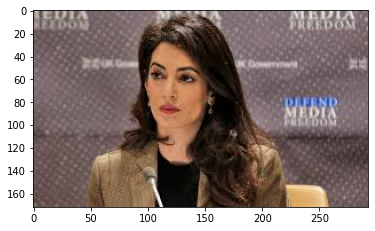

In [54]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/Amal_Blur.png' # os 모듈에 있는 getenv() 함수를 이용하여 필요한 파일의 경로를 img_path에 저장. 
img_orig = cv2.imread(img_path) # cv2.imread 경로에서 해당 이미지를 읽어 img_orig 변수에 저장.

print(img_orig.shape)

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))# cv2.cvtColor 입력 이미지의 색상 채널을 변경코드,cv2.COLOR_BGR2RGB: 이미지 색상 BGR 형식을 RGB 형식으로 채널변경) 
plt.show() 

 - os.getenv(x)함수는 환경 변수x의 값을 포함하는 문자열 변수를 반환. model_dir 에 "/aiffel/human_segmentation/models" 저장
 
 
 
 - os.path.join(a, b)는 경로를 병합하여 새경로 생성. model_file에 "/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5" 저장
 - https://engineer-mole.tistory.com/188 os.path.join :  경로(패스)명 조작에 관한 처리를 모아둔 모듈로써 구현된 함수. 인수에 전달된 2개의 문자열을 결합하여, 1개의 경로로. os.path.jon()을 사용하기 위해서는, os 모듈을 import.

In [55]:
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')  

- 다운로드한 모델을 이용해 PixelLib로 사용할 세그멘테이션 모델을 생성.




-  PixelLib 라이브러리 에서 가져온 클래스를 가져와서 semantic segmentation을 수행하는 클래스 인스턴스를 만듬.



- pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출

In [56]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)  

#### 2. 모델에 이미지를 입력

In [57]:
segvalues, output = model.segmentAsPascalvoc(img_path) # segmentAsPascalvoc()함수 호출하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴, 분할은 pacalvoc 데이터로 학습된 모델을 이용

- segmentAsPascalvoc라는 함수는  PASCAL VOC 데이터로 학습된 모델을 이용한다는 의미. 모델마다 학습시킨 데이터에 따라 결과값이 달라지므로 
  어떤 데이터를 학습시켰는지 확인하는것은 매우 중요.
  
  

- PASCAL VOC 데이터의 라벨 종류는 아래.

In [58]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

- 이중 사람(person) 라벨, 15를 가진 영역만 검출. 위사진은 0번 라벨 background와 15번 라벨으로만  segmentation 될듯.




- segmentAsPascalvoc() 함수를 호출, 입력된 이미지를 분할한 뒤 나온 결과값 중 output을 matplotlib으로 출력. Q.여기서 segmentAsPascalvoc() 함수를 언제 호출 ?  그냥 시각화만 했는데.

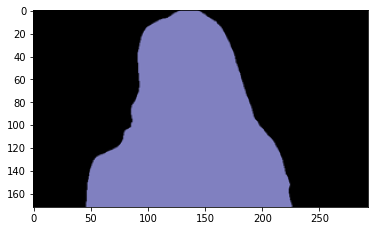

In [59]:
plt.imshow(output)
plt.show()

- segmentAsPascalvoc() 함수를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 배열값을 출력 

In [60]:
segvalues 

{'class_ids': array([ 0, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

- array값 0번 라벨 background와 15번 라벨으로만 분리.   





- Q  masks는 뭔가 ? Boundary area 인듯 
  https://swrush.tistory.com/590 Masking 기법은 어떤 배열을 대상으로 하여 배열 내 모든 값들 중 특정한 조건을 만족하는 것들만 선별하는 기법. 
  주로 2차원 이미지 배열에 대하여 적용하는 경우가 많지만, 어차피 기법 자체는 배열의 차원을 가리지 않기 때문에 어떤 형태의 배열이든 적용 될수 있다.
  
  

In [61]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
person


- output에는 세그멘테이션이 된 결과가 각각 다른색상으로 담겨 있음. segvalues에는 class_ids와 masks가 있다. 
  class_ids를 통해 어떤 물체가 담겨 있는지 알수 있음!
  
  
  
- 이제 0번, 15번 background 와 person가 output에 어떤 색상으로 나타나 있는지만 컬러맵으로 알아보면 

In [62]:
#컬러맵 만들기 
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

- PixelLib에 따르면 위와 같은 색을 사용했단 얘기. 0번, 15번 background 와 person의 색상은 무엇? 



- output 이미지가 BGR 순서로 채널배치가 되어있어(colormap은 RGB 순서) 추출해야하는 색상값 순서를 바꿔야함.

In [63]:
seg_color = (128,128,192) 

- 이제 seg_color로만 이루어진 마스크를 만들어 보자 !



- output의 픽셀별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False).




- output의 픽셀별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False).




- cmap 값을 white로 하니 ValueError: 'white' is not a valid value. 에러에 제시된 색상중 rainbow로 바꿨다 concat대 복잡해져 다시 gray.


(172, 293)


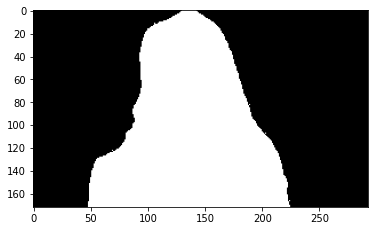

In [64]:
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show() 

- 원래 이미지와 겹쳐 보면 세그멘테이션이 얼마나 잘 되었는지 알수있다.



- 원본이미지를 img_show에 할당한뒤 사람이 있는 위치와 배경을 분리를 표현한 color_mask를 만든뒤 두 이미지를 합쳐 출력.




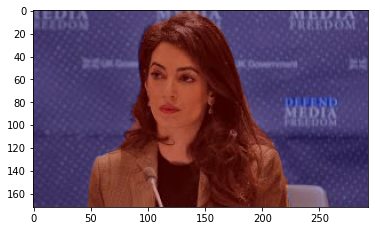

In [65]:
img_show = img_orig.copy() 

img_mask = seg_map.astype(np.uint8) * 255 # True과 False인 값을 각각 255과 0으로 바꿔줌.

color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET) # 255와 0을 적당한 색상으로 바꿈.


img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0) # 원본 이미지와 마스트를 적당히 합침. 0.6과 0.4는 두 이미지를 섞는 비율

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()


#### 3. 셸로우 포커스 만들기 -   배경 Blur 처리 ( 인물 )



- blur() 함수로 배경을 흐리게 만듬. 




- (13,13)은 blurring kernel size,(33,33)은 누군지 분간X.(3,33)은 2줄로 보임.(13,0)은 에러나옴,(13,1)블러 효과 별로.




- plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시.




- cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경.

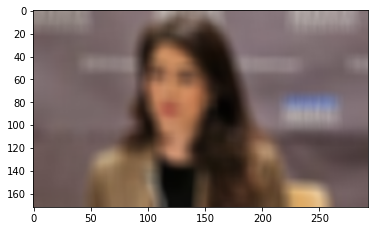

In [66]:
img_orig_blur = cv2.blur(img_orig, (13,13)) 

plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))# BGR 형식을 RGB 형식으로 변경  
plt.show()

- 흐려진 이미지에서 세그멘테이션 마스크를 이용해서 배경만 추출.



 - cv2.cvtColor : 입력 이미지의 색상 채널을 변경
 
 
 

 - cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나 연산을 하고 나면 배경은 255 사람은 0
   cv2.bitwise_and() : 배경만 있는 이미지. 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문. 
   사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 되고 사람이 사라지고 배경만 남음.

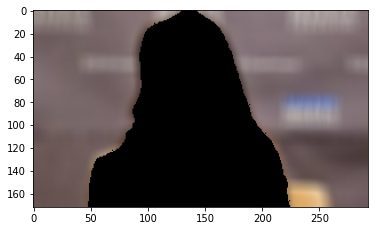

In [67]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

img_bg_mask = cv2.bitwise_not(img_mask_color)

img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

- bitwise_not 함수를 이용하면 이미지가 반전. 원래 마스크에서는 배경이 0, 사람이 255였으니 bitwise_not 연산을 하고 나면 배경은 255, 사람은 0이 되겠죠?



- 반전된 세그멘테이션 결과를 이용해서 이미지와 bitwise_and 연산을 수행하면 배경만 있는 영상. 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됨. 사람이 사라짐.

####  4. 셸로우 포커스 만들기 - 흐린 배경과 원본 영상 합성 ( 인물 )



- np.where(조건, 참일때, 거짓일때), segmentation mask가 255인(person 영역) 부분만 원본 이미지 값을 가져오고 아닌 영역은 blur된 이미지 값을 사용.

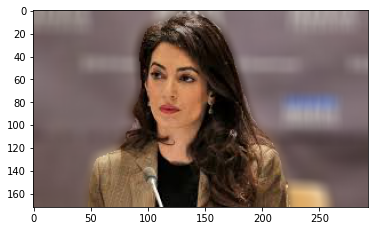

In [68]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)


plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

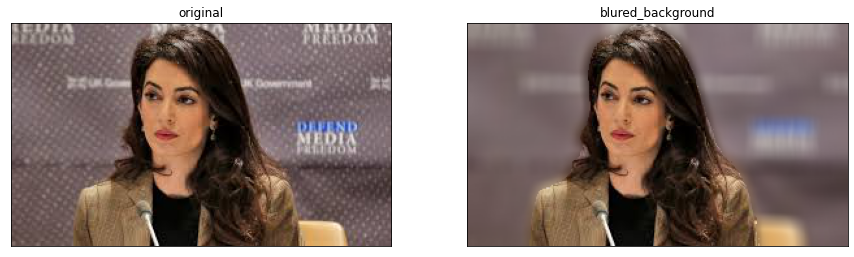

In [69]:
fig = plt.figure(figsize = (15,30))

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.title('original')
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB)) 
plt.title('blured_background')
plt.xticks([])
plt.yticks([])
plt.show()

####  5. 배경전환 크로마키 처리 ( 인물 )

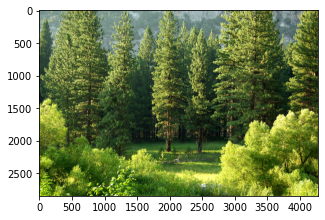

In [70]:
forest_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/forest.jpg'  
img_forest = cv2.imread(forest_path) 

plt.figure(figsize=(5,10))
plt.imshow(cv2.cvtColor(img_forest, cv2.COLOR_BGR2RGB))
plt.show()

In [71]:
print(img_forest.shape)
print(img_orig.shape)

(2848, 4288, 3)
(172, 293, 3)


- 두 image 크기 통일

In [72]:
img_orig_concat = np.where(img_mask_color==255, img_orig, 0)


img_forest_resize = cv2.resize(img_forest, (293, 172)) # (y, x)순으로 

img_forest_resize.shape

(172, 293, 3)

#### 6. 배경 교체하기 (크로마키 처리)

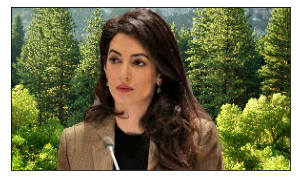

In [73]:

con = np.where(img_mask_color==255, img_orig_concat, img_forest_resize)

plt.figure(figsize=(5,10))
plt.imshow(cv2.cvtColor(con, cv2.COLOR_BGR2RGB))
plt.xticks([])
plt.yticks([])
plt.show()

In [74]:
!pwd # (python working directory) 현재 작업중인곳 경로

/aiffel/aiffel/human_segmentation/images


In [75]:
%cd ..# 현재 작업중인데 바로 전 경로

[Errno 2] No such file or directory: '..# 현재 작업중인데 바로 전 경로'
/aiffel/aiffel/human_segmentation/images


In [76]:
%cd human_segmentation/images # human_segmentation/images 의 경로

[Errno 2] No such file or directory: 'human_segmentation/images # human_segmentation/images 의 경로'
/aiffel/aiffel/human_segmentation/images


In [77]:
!ls # human_segmentation/images 에 들어있는 images 나열

Amal_Blur.png  Amal_chromakey.jpeg  bird_blur.png  forest.jpg  my_image.png


#### 7. 새 배경 blur처리

(183, 276, 3)


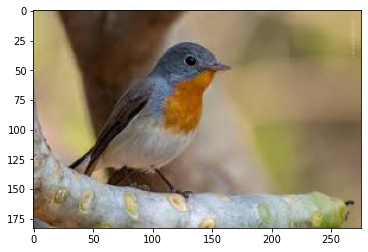

In [78]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/bird_blur.png'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)) 
plt.show() 

- 모델에 이미지를 입력

In [79]:
segvalues, output = model.segmentAsPascalvoc(img_path)

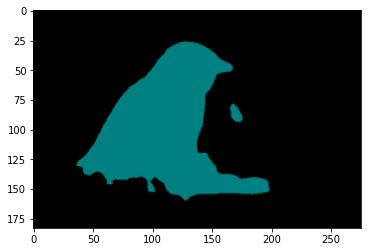

In [80]:
plt.imshow(output)
plt.show()

In [81]:
segvalues # segmentAsPascalvoc() 함수를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 배열값을 출력 

{'class_ids': array([0, 3]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [82]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
bird


- output에는 세그멘테이션이 된 결과가 각각 다른색상으로 담겨 있음. segvalues에는 class_ids와 masks가 있다. 
  class_ids를 통해 어떤 물체가 담겨 있는지 알 수 있음!
  
  
  
- 이제 물체마다 output에 어떤 색상으로 나타나 있는지만 알아내면 




- 컬러맵 만들기.  256이 2의 8승이라서 8, 채널이 3개라서 (rgb) 3

In [83]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력. 아래가 스풀 형태. 

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [84]:
seg_color = (0,128,128) # 색상순서 변경 - colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있어서

- 이제 seg_color로만 이루어진 마스크를 만들어 보자 !

(183, 276)


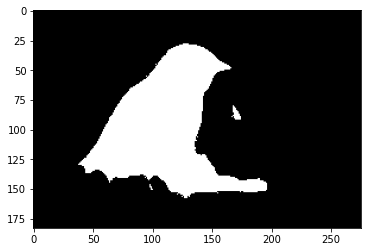

In [85]:
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show() 

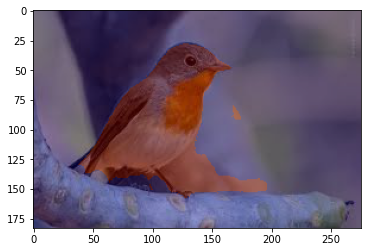

In [86]:
img_show = img_orig.copy() 

img_mask = seg_map.astype(np.uint8) * 255

color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET) 


img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0) 

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

#### 배경 흐리게 하기

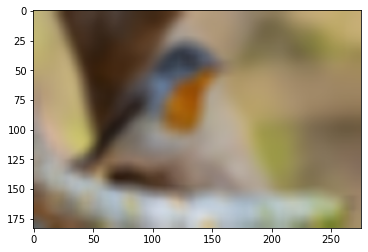

In [87]:
img_orig_blur = cv2.blur(img_orig, (13,13)) 

plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))# BGR 형식을 RGB 형식으로 변경  
plt.show()

- 흐려진 이미지에서 세그멘테이션 마스크를 이용해서 배경만 추출.

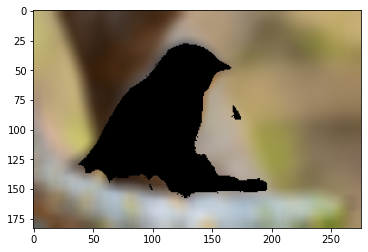

In [88]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나 연산을 하고 나면 배경은 255 사람은 0
img_bg_mask = cv2.bitwise_not(img_mask_color)

# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻음. 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 되고 사람이 사라지고 배경만 남음.
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

#### 흐린 배경 과  선명한 새 image 합치기

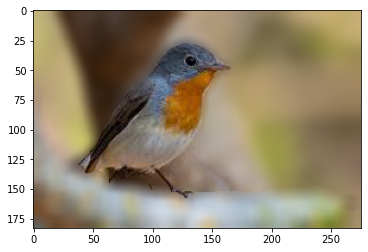

In [89]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)


plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

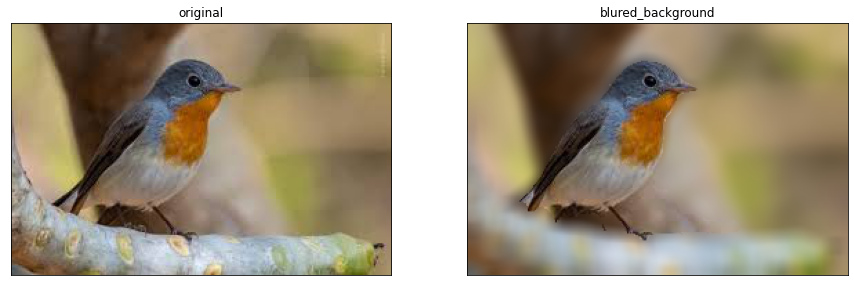

In [52]:
fig = plt.figure(figsize = (15,30))

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.title('original')
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB)) 
plt.title('blured_background')
plt.xticks([])
plt.yticks([])
plt.show()

- blur 처리된 image가 더 선명하게 보임.





### Step 2. 사진에서 문제점 찾기

1. 배경과 인물 경계가 선명치 않음.

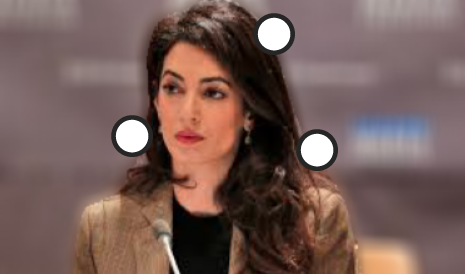

 2. 새가 뭘 흘리는 부분이 segementation(segvalues, output)부터 masking으로 배경만 추출할때까지 보이는 걸로 보아 segementation에  오류가 있는듯. 배경과 합성한 화면엔 안보임.  

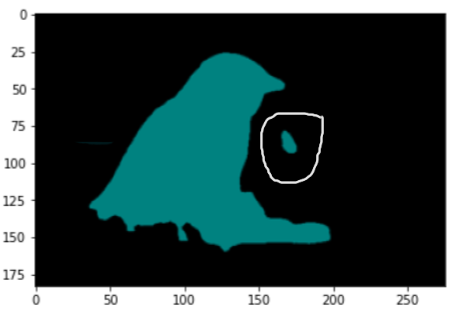

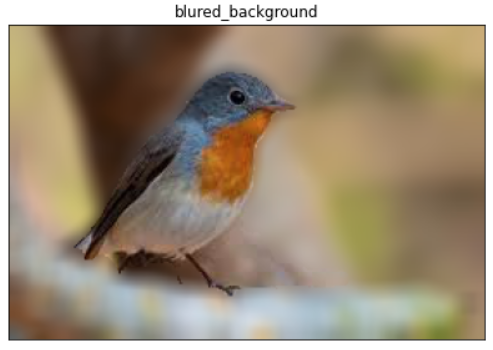

### Step 3. 해결 방법을 제안해 보기


- 생각해 볼 만한 주제를 아래에 몇 가지 제시. 아래를 읽어본 후, 여러분이 만든 인물모드 사진의 문제점을 해결할 방안을 정리, 제안.
  단순히 'XXX 기술을 사용한다.' 정도의 선언적 솔루션이 아니라, 여러분들이 선택한 기술이 DeepLab 모델의 Semantic Segmentation 이 만들어 낸 Mask 
  영역에 어떻게 적용되어 문제점을 보완하게 되는지의 메커니즘이 포함된 솔루션이어야 함.
  
  
  

- 세그멘테이션의 한계
  Semantic segmentation의 부정확성이 여러 가지 문제를 발생시키는 주요 원인. 피사계심도를 이용한 보케(아웃포커싱)효과는 말 그대로 심도를 표현하기 
  때문에 초점이 잡힌 거리를 광학적으로 아주 섬세하게 구별(segmentation) 하지만 이를 따라 한 semantic segmentation 모듈은 정확도가 1.00이 
  되지 않는 한 완벽히 구현하기는 힘듬.
  
  
  
  

- 피사계 심도 이해하기
  https://m.blog
  아웃포커싱 됐다는 피사계 심도가 낮다. outfocusing하는 5가지 방법.
  
  
  

- https://www.adobe.com/kr/creativecloud/photography/discover/shallow-depth-of-field.html
  인물 사진에서 피사계 심도 활용 기법. 얕은 피사계 심도 사용 시 어려운 점. 초점을 잘 맞추는 방법.
  
  


- 3D Camera 활용하기
  이미지를 2D 방식으로 받아들이는 한계를 넘어 3D로 인식하려는 시도는 꽤 오래전부터 계속되어 왔다. 스테레오 비전, ToF 방식 등이 사용. 하드웨어 이미지   센서를 통한 3D 이미징 기술이 많이 발전. 아래 참고 자료.
  
  

- https://news.skhynix.co.kr/post/next-gen-3d
  21년 5월 [미래 반도체 기술] 차세대 3D 이미지센서 소자 - 단광자눈사태다이오드(SPAD) - 현재 이미지센서의 최대 수요처는 스마트폰으로 전체 이미지센서   수요의 약 70% 정도를 차지. 자율주행자동차를 비롯한 미래 산업에서도 이미지 센서의 수요가 크게 증가할 것으로 예상. 이미지센서 선도 그룹들의 시장 장악   력이 크게 감소할 수도 있다는 전망도 나온다. 이에 소니(Sony)와 같은 기존 선도 업체들은 차세대 이미지센서 연구개발을 적극적으로 수행. 차세대 이미지   센서 시장을 주도할 새로운 폼팩터 ‘3D 이미지 센서’ ; 최근 차세대 이미지센서 시장을 주도할 새로운 폼팩터(Form Factor)로는 ‘3D  이미지센서’가 크게 
  각광받고 있다. 기존 이미지센서는 2D 이미지만 구현할 수 있는 데 반해, 3D 이미지센서는 사물까지의 거리(심도)를 측정함으로써 더 정밀하게 물체나 
  동작을 인식해 이를 3D 이미지로 구현할 수 있기 때문. 

- 소프트웨어 기술 활용하기
  하드웨어 개발과 생산에는 비용이 많이 들기 때문에 제한된 하드웨어를 이용하면서 소프트웨어로 그 한계를 극복하려는 노력도 많다. 구글의 struct2Depth가   대표적인 예.  https://sites.google.com/view/struct2depth , 뮌헨공대 Ph.D 학생 논문, 깃헙에 181개 코드올림.
  
  
  

- 다른 기술과 융합해 보기
  구글 pixel4에는 물체의 온도를 측정하는 IR(적외선) 카메라가  3d depth sensing이 가능.




- https://ai.googleblog.com/2020/04/udepth-real-time-3d-depth-sensing-on.html
  Google Research blog : uDepth: Real-time 3D Depth Sensing on the Pixel 4
  
  
  

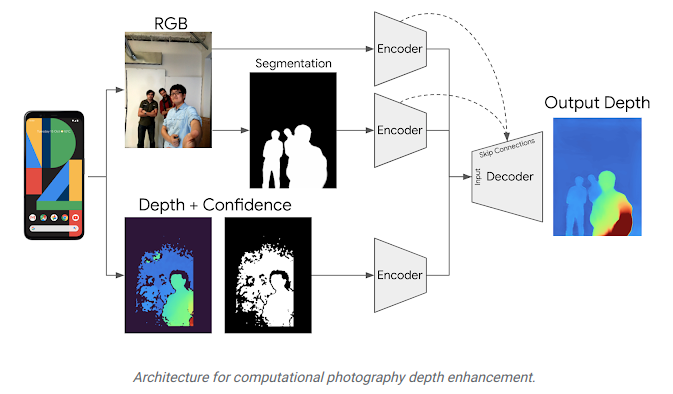

#### Semantic segmentation의 masking 경계 선명치 못함 개선용  Solution 



1. 용량 차지해도 고화질 image를 쓰니 경계가 좀더 선명해짐


2.  MODNet 활용

 * MODNet는 RGB image를 통해 labeled dataset에서 객체를 학습시킨것.
 
 
 
   * MODNet는 unlabeled data에서 real-world data에 적용시키기위해 적절히 튠닝 되었다 



   * one-frame delay (OFD) 기법이 예측된 alpha mattes를 부드럽게 한다

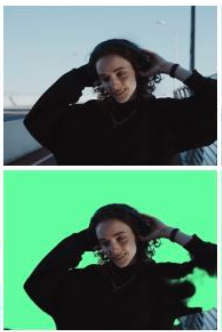

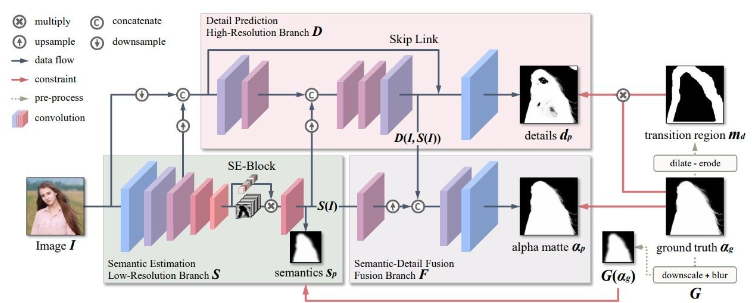

### Reference

- https://deep-learning-study.tistory.com/134 크로마키 합성




- https://engineer-mole.tistory.com/188 os.path.join




- https://deep-learning-study.tistory.com/104 mask 연산  




- https://code.tutsplus.com/ko/articles/how-to-run-unix-commands-in-your-python-program--cms-25926  ls






### 결과 및 회고




- image를 쥬피터 경로에 넣는데 png image 용량이 22.8 MB니까 upload하는데 시간만 가고 진행이 안돼 jpg image로 교체.
  합성할때  자연스럽다고 해서 초반에 png image를 선택했다 upload등에 시간너무 걸려 확인해보니  png 용량이 jpg의 10배가 넘음. 
  
  
  

- 인물사진은 png, 배경은 jpg로 합성해보았다.다른 확장자 image끼리도 합성하는덴 무리 없었음.




-  *255 빼니 masking 안됨 : img_mask = seg_map.astype(np.uint8) * 255 # True과 False인 값을 각각 255과 0으로 바꿔줌.

    color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET) # 255와 0을 적당한 색상으로 바꿈.





- 마지막 blur처리만 남았는데, error를 검색하고 코드를 촘촘히 검토했음에도 error 이유를 못찾다 두 퍼실님이 경로를 한단계씩 검색하는 4가지 코드를 알려주신 덕분에  경로처리 글자 1개를 대문자로 잘못 입력한것을 딱 찾아낼수있었음 ! 




- 코드를 잘 짜는것도 중요하나 나온 에러를 효과적으로 수습하는것도 매우 중요하다는것 수시로 절감 ! 


#### [해결하지 못한 의문점]

- model_file = os.path.join(model_dir,  : pascal voc에 대해 훈련된 예외모델(model_file)을 로드하는 함수를 호출한다고 노드에 설명. 
  근데 이걸 왜하는지 노드 다시보고 검색해봐도 이 flow에서 이걸 왜 하는지 모르겠음. 왜  예외모델 ?




- bird masking시 seg_map 흑백 분할 할때부터 새 앞쪽에 물체 같은것도 masking 오류가 있는데 없애는것 끝내 해결못함. (합친 image엔 안보임)